In [32]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from torchvision.datasets import CocoDetection
from torchvision.datasets import ImageFolder
from torchvision import transforms

from data_utils import display

In [2]:
ds = CocoDetection(
    root = 'data/recycle_coco/train',
    annFile = 'data/recycle_coco/train.json',
    transform=None)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


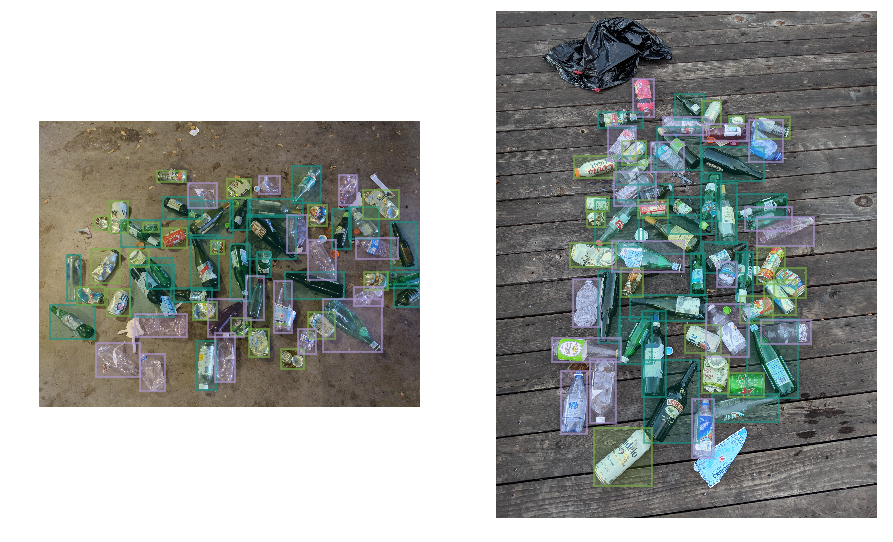

In [3]:
np.random.seed(0)
idx1, idx2 = np.random.randint(0, len(ds), size=2)
fig, axs = plt.subplots(1,2, figsize=(15,20))
display(*ds[idx1], axs[0])
display(*ds[idx2], axs[1])
plt.show()

In [4]:
# Bounding Box Stats
size_lst = []
for img, labels in ds:
    for label in labels:
        x,y,w,h = label['bbox']
        size_lst.append(w)
        size_lst.append(h)
s = np.array(size_lst)
print(f'min:{s.min():.1f}, max:{s.max():.1f}, mean:{s.mean():.1f}, median:{np.median(s):.1f}, std:{s.std():.1f}')

min:82.0, max:852.0, mean:317.5, median:292.0, std:129.6


In [7]:
s.mean() + s.std()

447.0845834644213

In [35]:
transform = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip()])

ds = ImageFolder('data/recycle_classify/train', transform)
len(ds)

752

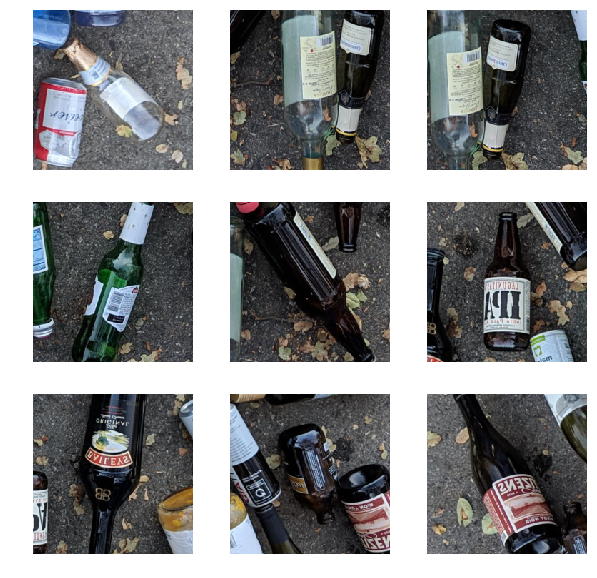

In [36]:
np.random.seed(0)
fig, axs = plt.subplots(3,3, figsize=(10,10))
for ax, idx in zip(axs.ravel(), range(9)):
    ax.imshow(ds[idx][0])
    ax.axis('off')

In [24]:
ds[15][0].show()